In [1]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
torch.cuda.empty_cache()
device = "cuda"

In [2]:
num_vectors = 2000
vector_len = 100

In [3]:
big_matrix = torch.randn(num_vectors, vector_len, device=device)
big_matrix /= big_matrix.norm(p=2, dim=1, keepdim=True)
big_matrix.requires_grad_(True)

tensor([[ 0.2091, -0.1599, -0.0819,  ...,  0.0297,  0.2180, -0.1100],
        [ 0.0307,  0.1989, -0.0804,  ..., -0.1273, -0.0464, -0.0216],
        [-0.1705, -0.1632, -0.0038,  ..., -0.0937, -0.0570, -0.2045],
        ...,
        [-0.1797, -0.0513, -0.0770,  ...,  0.0100,  0.0735, -0.2152],
        [ 0.1511,  0.0650, -0.0788,  ...,  0.0097,  0.2173, -0.1151],
        [-0.0167,  0.1312,  0.0594,  ..., -0.1139,  0.0130, -0.0396]],
       device='cuda:0', requires_grad=True)

In [4]:
optimizer = torch.optim.Adam([big_matrix], lr=0.01)
num_steps = 250

losses= []
dot_diff_cutoff = 0.01
big_id = torch.eye(num_vectors, num_vectors, device=device)

In [5]:

for step_num in tqdm(range(num_steps)):
    optimizer.zero_grad()
    dot_products = big_matrix @ big_matrix.T

    diff = dot_products - big_id
    loss = (diff.abs() - dot_diff_cutoff).relu().sum()
    loss += num_vectors * diff.diag().pow(2).sum()

    loss.backward()
    optimizer.step()
    losses.append(loss.item())

100%|██████████| 250/250 [00:00<00:00, 491.01it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

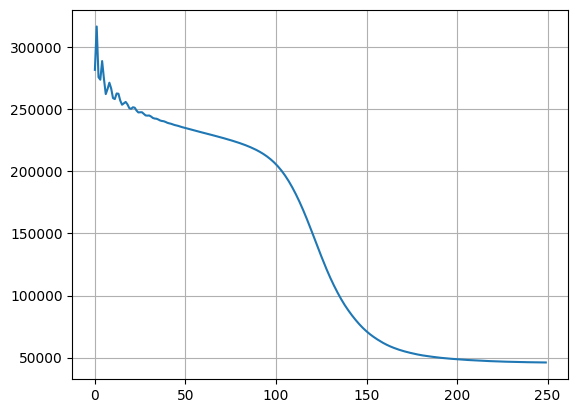

In [6]:
plt.plot(losses)
plt.grid(1)
plt.show

In [13]:
big_matrix[0]

tensor([ 0.1727,  0.0568,  0.0137, -0.1138, -0.0447,  0.1574,  0.1912,  0.0813,
        -0.1168, -0.0546,  0.0611,  0.0809,  0.0590,  0.0079,  0.1139,  0.0390,
        -0.1183,  0.0139,  0.0485,  0.0920,  0.1523,  0.0945, -0.0551, -0.0940,
        -0.0358, -0.0473,  0.0067, -0.0251,  0.0954, -0.0303,  0.1363,  0.0867,
         0.2777, -0.0557, -0.0538, -0.0534, -0.1314,  0.1093,  0.0877, -0.0284,
        -0.1534,  0.0618,  0.2450,  0.1680,  0.1475,  0.1036,  0.1465, -0.1047,
         0.0586, -0.1106,  0.0516,  0.0899, -0.0367, -0.2183, -0.1328,  0.1562,
         0.0414,  0.1050,  0.0830,  0.1733,  0.1337,  0.0534, -0.0333,  0.0327,
         0.1037,  0.1399,  0.0256, -0.1082, -0.1739, -0.0656,  0.0518,  0.0175,
        -0.1822,  0.0323, -0.0920,  0.0435,  0.0027,  0.0446, -0.0425,  0.0608,
        -0.0800,  0.0149, -0.0932, -0.0306,  0.0352, -0.1447,  0.1130,  0.0116,
        -0.0253, -0.1054, -0.0042, -0.0136, -0.0597,  0.0414,  0.0408, -0.0013,
         0.1157, -0.0039, -0.0423, -0.10

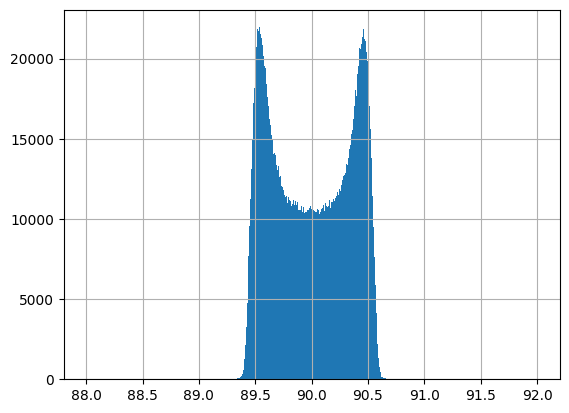

In [11]:
dot_products = big_matrix @ big_matrix.T
norms = torch.sqrt(torch.diag(dot_products))
normed_dot_products = dot_products / torch.outer(norms, norms)
angles_degrees = torch.rad2deg(torch.acos(normed_dot_products))
self_orthogonality_mask = ~(torch.eye(num_vectors, num_vectors).bool())

plt.hist(angles_degrees[self_orthogonality_mask].cpu().detach().numpy().ravel(), bins=1000, range=(88, 92))
plt.grid(1)
plt.show()

In [8]:
print(self_orthogonality_mask)

tensor([[False,  True,  True,  ...,  True,  True,  True],
        [ True, False,  True,  ...,  True,  True,  True],
        [ True,  True, False,  ...,  True,  True,  True],
        ...,
        [ True,  True,  True,  ..., False,  True,  True],
        [ True,  True,  True,  ...,  True, False,  True],
        [ True,  True,  True,  ...,  True,  True, False]])


In [9]:
angles_degrees[self_orthogonality_mask]

tensor([89.6455, 89.7718, 89.8292,  ..., 89.6309, 89.6322, 89.6187],
       device='cuda:0', grad_fn=<IndexBackward0>)